In [20]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [21]:
results_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/coupling/pvc11/monkey3.h5')

In [22]:
results = h5py.File(results_path, 'r')

In [23]:
glmnet = results['glmnet_poisson']
uoi_poisson_log = results['uoi_poisson_log']
uoi_poisson_aic = results['uoi_poisson_AIC']
uoi_poisson_bic = results['uoi_poisson_BIC']
uoi_fits = [uoi_poisson_log, uoi_poisson_aic, uoi_poisson_bic]

In [24]:
Y = results['glmnet_poisson/Y'][:]
n_folds = 10
n_neurons = Y.shape[1]

In [27]:
list(glmnet)

['AICs',
 'BICs',
 'Y',
 'coupling_coefs',
 'deviances_test',
 'deviances_train',
 'intercepts',
 'test_folds',
 'test_lls',
 'train_folds',
 'train_lls']

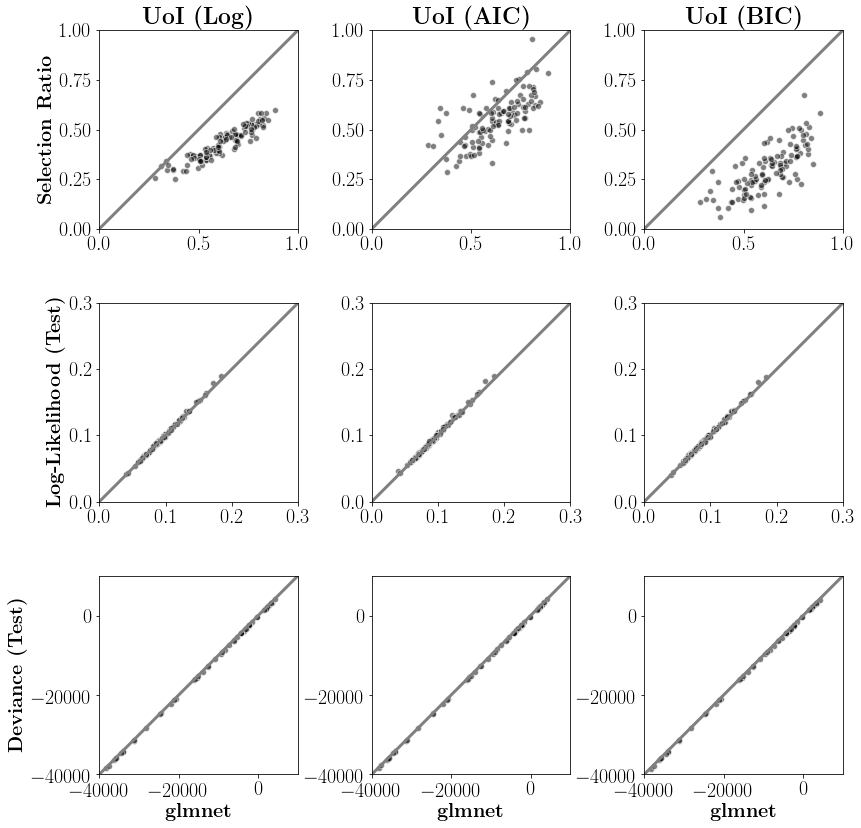

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for idx, ax in enumerate(axes[0]):
    ax.scatter(
        np.median(np.count_nonzero(glmnet['coupling_coefs'], axis=2), axis=0) / 105.,
        np.median(np.count_nonzero(uoi_fits[idx]['coupling_coefs'], axis=2), axis=0) / 105.,
        color='k',
        edgecolor='white',
        alpha=0.5
    )
    
    ax.plot([0, 1], [0, 1], color='gray', linewidth=3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect('equal')
    
for idx, ax in enumerate(axes[1]):
    ax.scatter(
        np.median(glmnet['deviances_test'], axis=0) / Y.shape[0],
        np.median(uoi_fits[idx]['deviances_test'], axis=0) / Y.shape[0],
        color='k',
        edgecolor='white',
        alpha=0.5
    )
    
    ax.plot([0, 0.3], [0, 0.3], color='gray', linewidth=3)
    ax.set_xlim([0, 0.3])
    ax.set_ylim(ax.get_xlim())
    ax.set_aspect('equal')
    
for idx, ax in enumerate(axes[2]):
    ax.scatter(
        np.median(glmnet['BICs'], axis=0),
        np.median(uoi_fits[idx]['BICs'], axis=0),
        color='k',
        edgecolor='white',
        alpha=0.5
    )
    
    ax.plot([-40000, 10000], [-40000, 10000], color='gray', linewidth=3)
    ax.set_xlim([-40000, 10000])
    ax.set_ylim(ax.get_xlim())
    ax.set_aspect('equal')

axes[0, 0].set_ylabel(r'\textbf{Selection Ratio}', fontsize=20)
axes[1, 0].set_ylabel(r'\textbf{Log-Likelihood (Test)}', fontsize=20)
axes[2, 0].set_ylabel(r'\textbf{Deviance (Test)}', fontsize=20)

axes[0, 0].set_title(r'\textbf{UoI (Log)}', fontsize=23)
axes[0, 1].set_title(r'\textbf{UoI (AIC)}', fontsize=23)
axes[0, 2].set_title(r'\textbf{UoI (BIC)}', fontsize=23)

axes[2, 0].set_xlabel(r'\textbf{glmnet}', fontsize=20)
axes[2, 1].set_xlabel(r'\textbf{glmnet}', fontsize=20)
axes[2, 2].set_xlabel(r'\textbf{glmnet}', fontsize=20)

plt.tight_layout()
# plt.savefig('uoi_poisson_pvc11_monkey1_results.pdf', bbox_inches='tight')